# Intalling Package

In [30]:
#%pip install python-binance
#%pip install numpy 
#%pip install pandas 
#%pip install matplotlib
#%pip install datetime 

# Initialation

In [1]:
import binance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta as td, datetime

In [2]:
def hodl(portfolio,early_balances):
    crypto_values = early_balances/portfolio[:1]
    balances = crypto_values.values * portfolio
    total_balances = balances.sum(axis=1)
    return total_balances,crypto_values

def rebalance(portfolio,crypto_values):
    asset_rebalance = []
    desire_balance = []
    total_rebalance = []
    weightss = []
    early_values = crypto_values.values
    for i in range(len(portfolio)):
        b = early_values * portfolio.values[i] # balance
        tb = np.sum(b) # total balance
        b_rebalance = np.asarray(weights) * tb # Balance Rebalance
        cv_rebalance = b_rebalance/portfolio.iloc[i] # Crypto Value After Rebalance
        desire = b_rebalance-b # Desire each asset
        desire_balance.append(desire.flatten()) 
        total_desire = np.sum(np.abs(desire))
        t_rebalance = np.sum(b_rebalance) - (total_desire*trading_fee)
        total_rebalance.append(t_rebalance) # Total balance after rebalance 
        early_values = cv_rebalance.values
        asset_rebalance.append(cv_rebalance)
        weightss.append(weights)
    total_rebalance = pd.DataFrame(total_rebalance).set_index(portfolio.index)
    desire_balance = pd.DataFrame(desire_balance, columns=portfolio.columns).set_index(portfolio.index)
    weightss =  pd.DataFrame(weightss).set_index(portfolio.index)
    return total_rebalance,asset_rebalance,desire_balance,weightss

def rebalance_wd(portfolio,crypto_values):
    asset_rebalance = []
    desire_balance = []
    total_rebalance = []
    early_values = crypto_values.values
    for i in range(len(portfolio)):
        b = early_values * portfolio.values[i] # balance
        tb = np.sum(b) # total balance
        b_rebalance = np.asarray(weights) * tb # Balance Rebalance
        cv_rebalance = b_rebalance/portfolio.iloc[i] # Crypto Value After Rebalance
        desire = b_rebalance-b # Desire each asset
        desire_balance.append(desire.flatten()) 
        total_desire = np.sum(np.abs(desire))
        t_rebalance = np.sum(b_rebalance) - (total_desire*trading_fee)
        if desire.all() > 10000:
            total_rebalance.append(t_rebalance) # Total balance after rebalance 
            early_values = cv_rebalance.values
            asset_rebalance.append(cv_rebalance)
        else:
            total_rebalance.append(np.sum(b_rebalance))
            early_values = early_values
            asset_rebalance.append(b)
    total_rebalance = pd.DataFrame(total_rebalance).set_index(portfolio.index)
    desire_balance = pd.DataFrame(desire_balance, columns=portfolio.columns).set_index(portfolio.index)
    return total_rebalance,asset_rebalance,desire_balance

# **Loading the data**
Kita ingin melatih pada data pasar cryptocurency (1 Bulan), dan di test dengan bulan berikutnya.

In [3]:
client = binance.Client()

tickers = ['ADAUSDT','HBARUSDT','BTCUSDT','ETHUSDT']
#date format month day year
startdate = '01-01-2020'
enddate = '03-30-2024'

columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Can be ignored']

crypto_data = {}
ndata=[]
for ticker in tickers:
    bars = client.get_historical_klines(ticker, client.KLINE_INTERVAL_1DAY, startdate, enddate)
    df = pd.DataFrame(bars, columns=columns)
    df = df.iloc[:,:6]
    df = df.set_index("Date")
    df.index = pd.to_datetime(df.index,unit="ms")
    df = df.astype("float")
    crypto_data[ticker] = df
    ndata.append(len(np.array(crypto_data[ticker].Close)))

portfolio = []
for ticker in tickers:
    portfolio.append(crypto_data[ticker].Close)
portfolio = pd.concat(portfolio, axis=1)
portfolio = portfolio.set_axis(axis=1,labels=tickers)
portfolio = portfolio.resample('W').last()    
    
d1 = datetime.strptime(startdate, '%m-%d-%Y')
d2 = datetime.strptime(enddate, '%m-%d-%Y')

def get_delta(d1, d2):
    delta = d2 - d1
    return delta

delta = get_delta(d1,d2)
print(delta)
print(ndata)
portfolio.head()

1550 days, 0:00:00
[1550, 1550, 1550, 1550]


,ADAUSDT,HBARUSDT,BTCUSDT,ETHUSDT
Date,,,,
2020-01-05,0.03460,0.01157,7358.75,135.37
2020-01-12,0.03792,0.01095,8184.98,146.54
2020-01-19,0.04200,0.01085,8701.70,166.79
2020-01-26,0.04477,0.01164,8615.00,167.86
2020-02-02,0.05570,0.01309,9331.51,188.44


<Axes: xlabel='Date'>

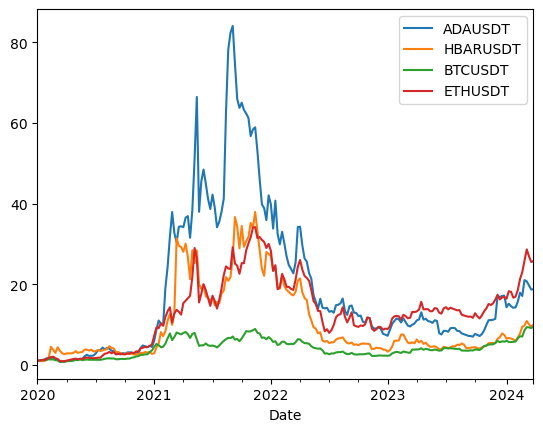

In [4]:
(portfolio/portfolio.iloc[0,:]).plot()

total early balance =  4 $


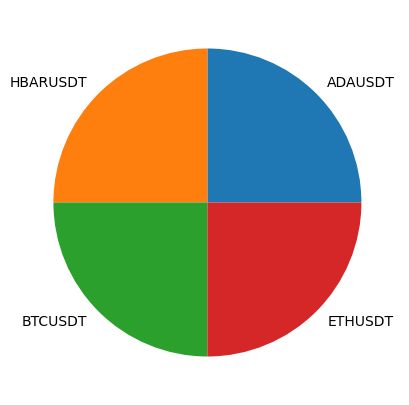

In [11]:
early_balances = [1,1,1,1]
trading_fee = 0.03
total_early_balances = np.sum(early_balances)
print('total early balance = ', total_early_balances, '$')
resulta = []
for i in range(len(ndata)):
    resulta += [1/len(ndata)]
resulta
weights = resulta
total_weights = np.sum(weights)
if total_weights != 1.0:
    print('Error jumlah rasio harus 100%')
pd.Series(weights,tickers).plot.pie(figsize=(5,5));

<Axes: xlabel='Date'>

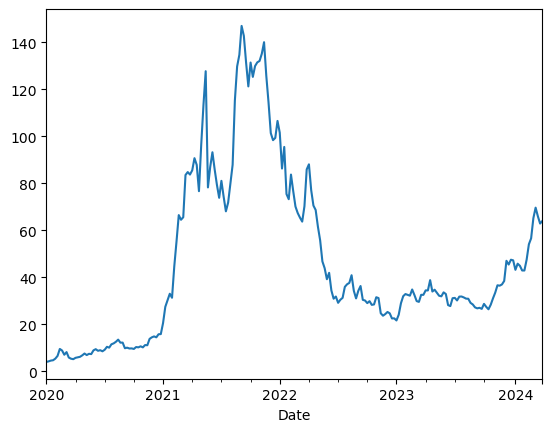

In [12]:
total_balances, crypto_values = hodl(portfolio,early_balances)
total_balances.plot()

<Axes: xlabel='Date'>

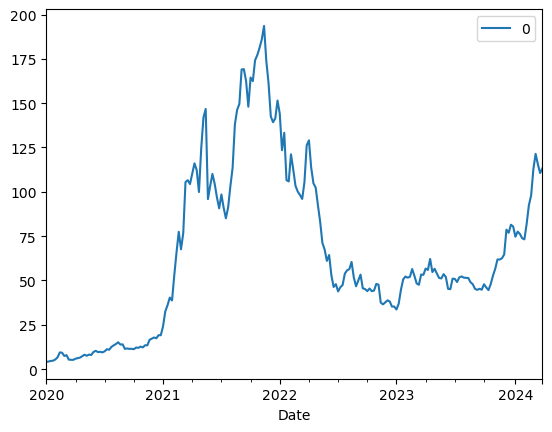

In [13]:
total_rebalance,asset_rebalance,desire_balance,weightss = rebalance(portfolio,crypto_values)
total_rebalance.plot()

In [14]:
desire_balance.head()

,ADAUSDT,HBARUSDT,BTCUSDT,ETHUSDT
Date,,,,
2020-01-05,0.000000,0.000000,1.110223e-16,0.000000
2020-01-12,-0.036664,0.112877,-5.298856e-02,-0.023225
2020-01-19,-0.034586,0.089062,1.251531e-02,-0.066992
2020-01-26,-0.036607,-0.044417,4.983695e-02,0.031187
2020-02-02,-0.118325,0.022424,7.115969e-02,0.024741


<Axes: xlabel='Date'>

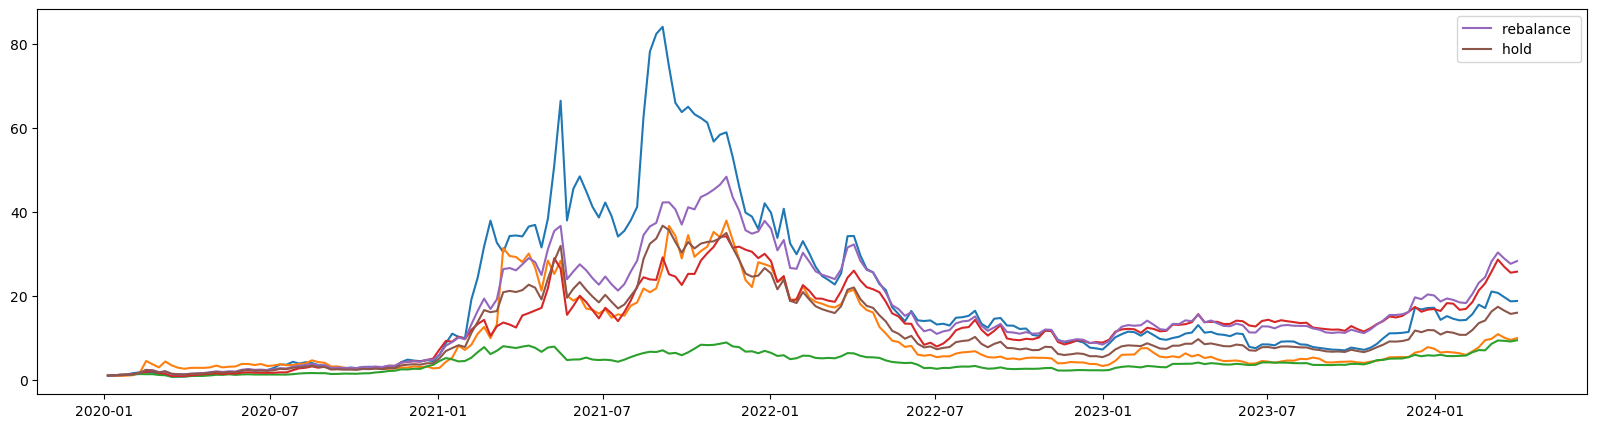

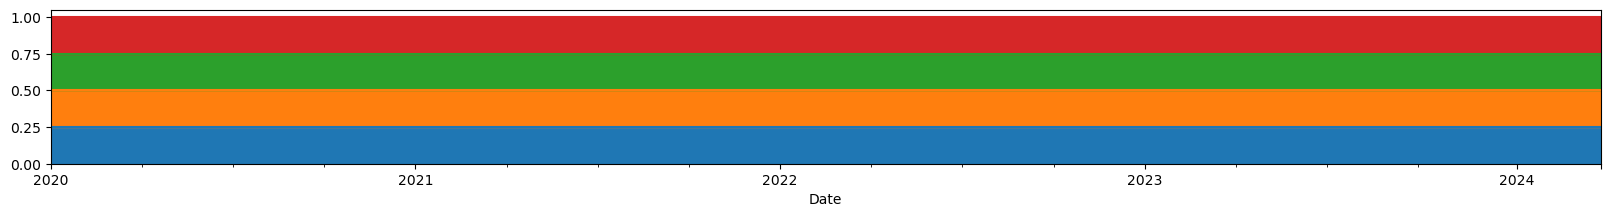

In [15]:
fig1 = plt.figure(figsize=(20,5))
ax1 = fig1.add_subplot(111)

ax1.plot((portfolio/portfolio.iloc[0,:]))
ax1.plot((total_rebalance/total_rebalance.iloc[0]),label='rebalance ')
ax1.plot((total_balances/total_balances.iloc[0]),label='hold ')
plt.legend()
weightss.plot.area(figsize=(20,2), legend=None)

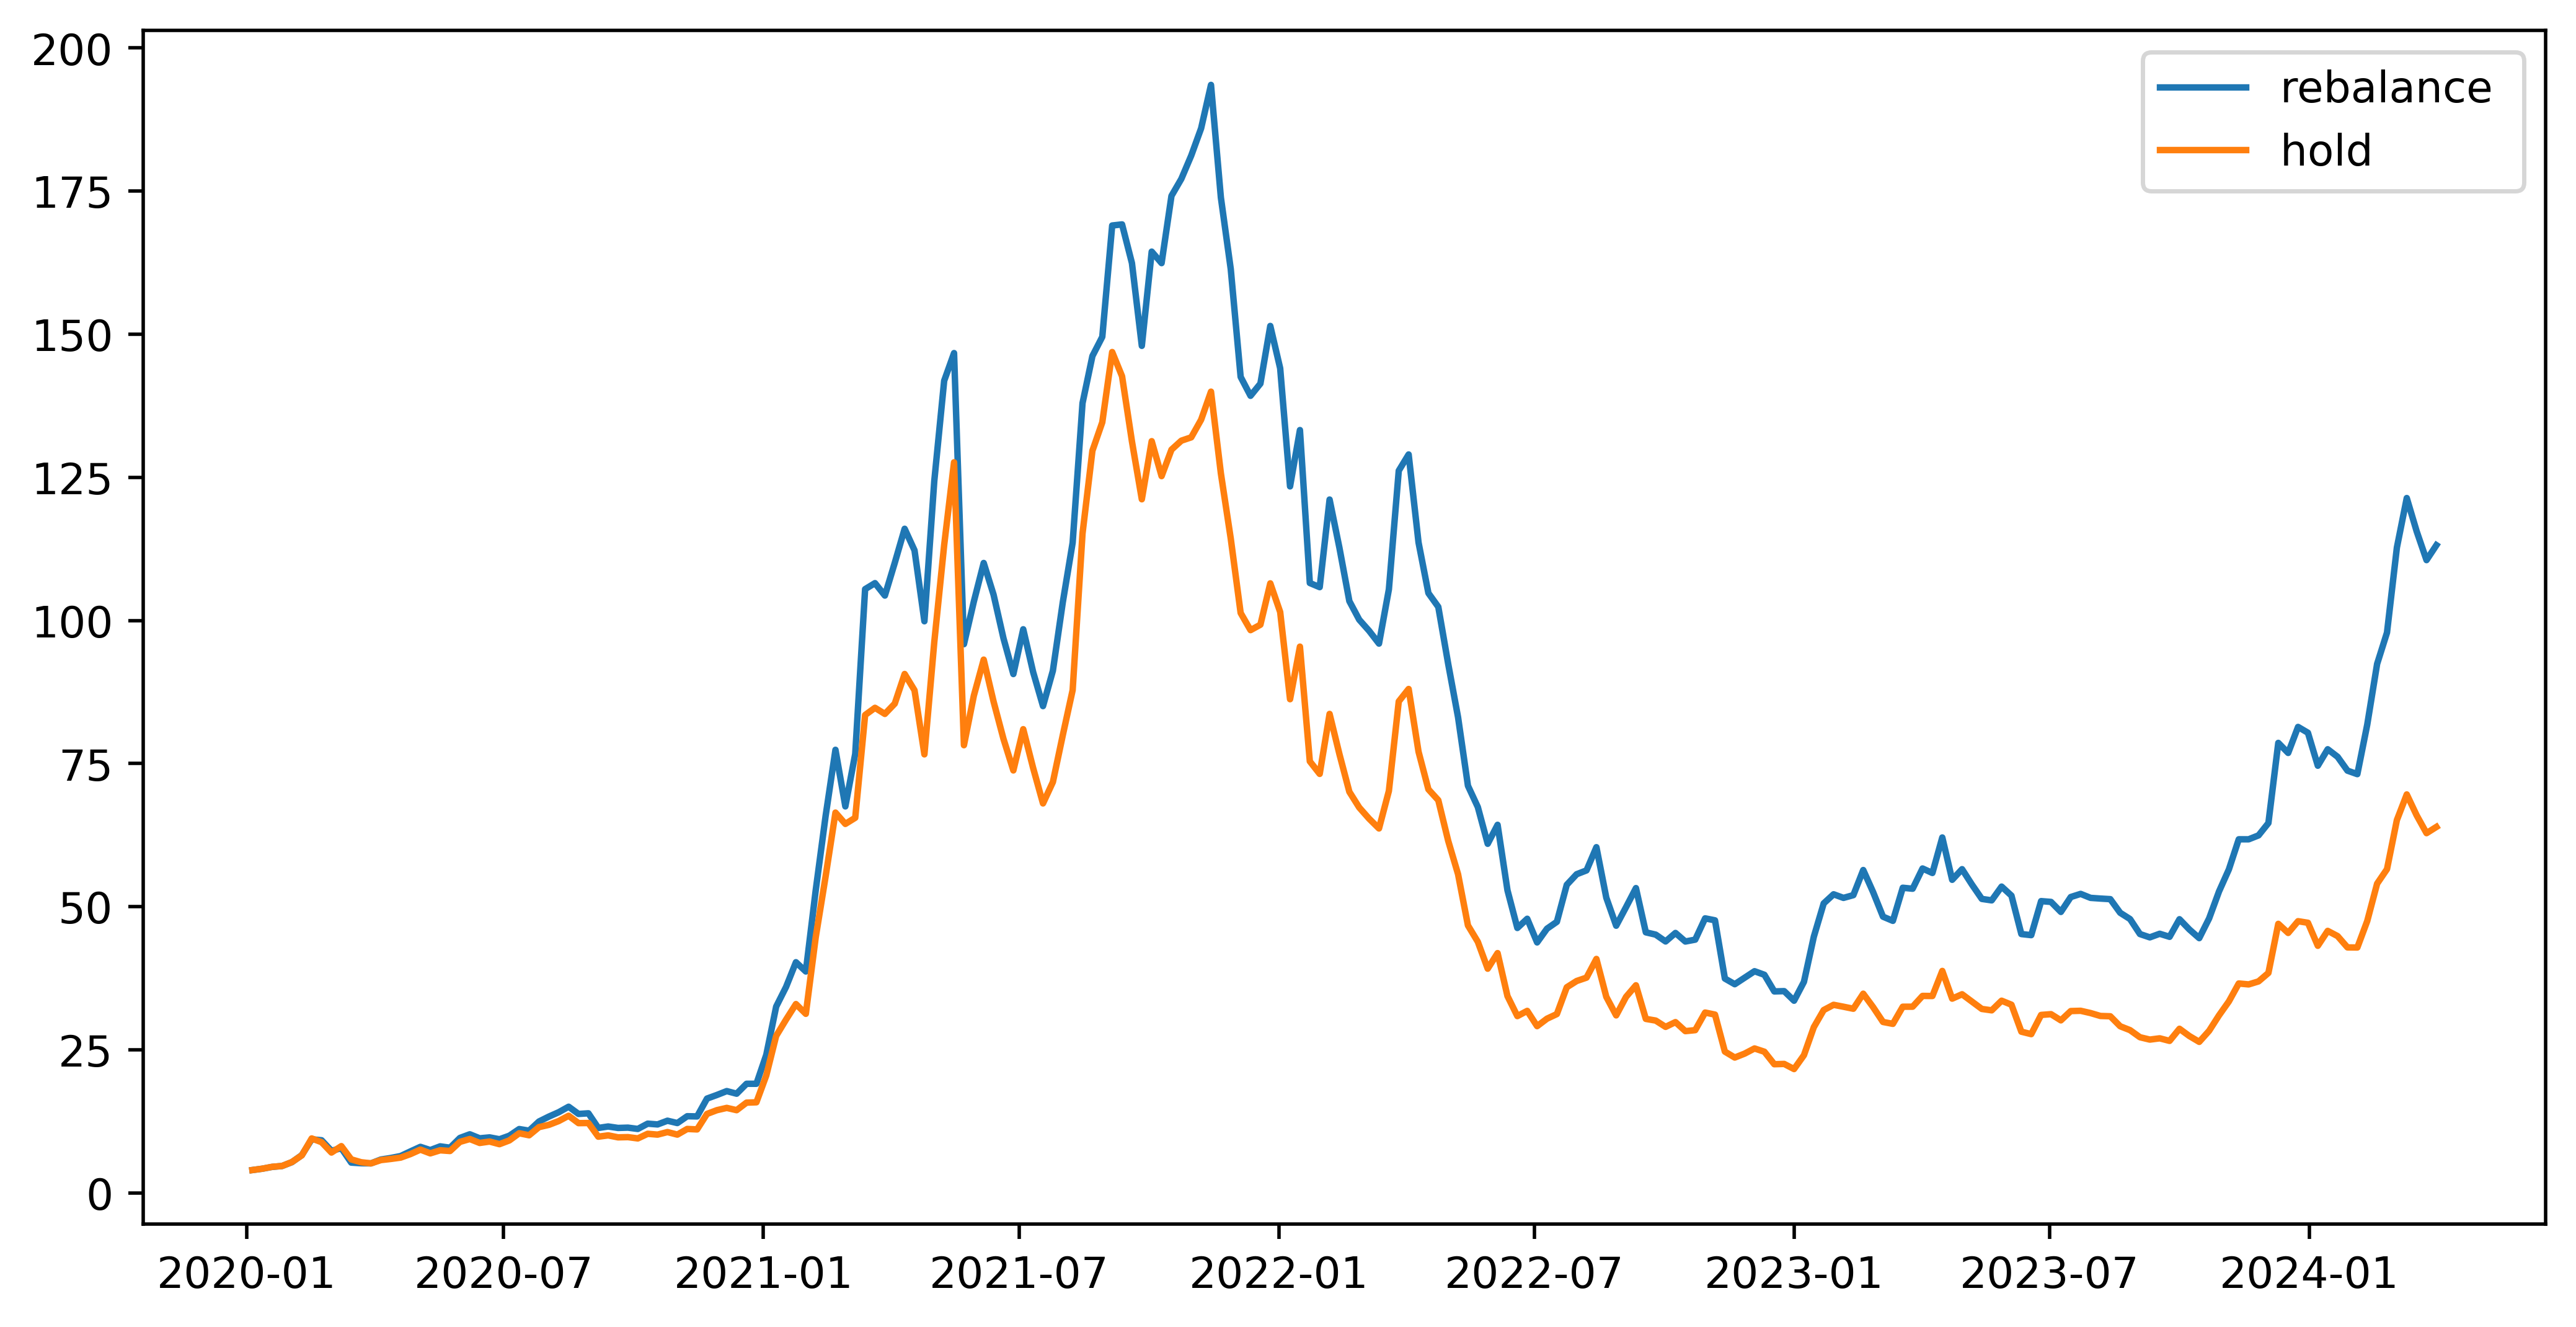

In [16]:
plt.figure(figsize=(10,5), dpi=500)
plt.plot(total_rebalance.index, total_rebalance.values,'-', label='rebalance ')
plt.plot(total_balances.index, total_balances.values,'-', label='hold ')
plt.legend()
plt.show()

## Return Rate
Return
The direct method to calculate the return or the holding period return $R$ over a single period of any length of time is:
$$R=\frac {V_f-V_i}{V_i}$$
$R$	=	return
$V_f$	=	final value, including dividends and interest
$V_i$	=	initial value

In [17]:
def return_rate(end_value,start_value):
    """
    Menghitung tingkat pengembalian berdasarkan nilai akhir dan awal.

    Args:
        end_value (float): Nilai pada akhir periode.
        start_value (float): Nilai pada awal periode.

    Returns:
        float: Persentase pengembalian.

    """
    return 100*(end_value-start_value)/np.abs(start_value)

In [18]:
# Return rate Rebalance
rebalance_return = return_rate(total_rebalance.values.flatten()[-1], total_rebalance.values.flatten()[0])
print(f"Return rate Rebalance: {rebalance_return:.2f}%")

# Return rate HODL
hodl_return = return_rate(total_balances.values[-1], total_balances.values[0])
print(f"Return rate HODL: {hodl_return:.2f}%")

# Return rates for individual tickers in the portfolio
for ticker in portfolio.columns:
    ticker_return = return_rate(portfolio[ticker].iloc[-1], portfolio[ticker].iloc[0])
    print(f"Return rate: {ticker_return:.2f}%, Ticker: {ticker}")


Return rate Rebalance: 2728.96%
Return rate HODL: 1498.45%
Return rate: 1778.32%, Ticker: ADAUSDT
Return rate: 894.81%, Ticker: HBARUSDT
Return rate: 843.37%, Ticker: BTCUSDT
Return rate: 2477.31%, Ticker: ETHUSDT


## Staking ADA rate
The total accumulated value, including the principal sum P plus compounded interest I, is given by the formula:
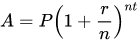
where:
A is the final amount
P is the original principal sum
r is the nominal annual interest rate
n is the compounding frequency
t is the overall length of time the interest is applied (expressed using the same time units as r, usually years).

In [19]:
def calculate_staking_rate(start_date, end_date):
    time = len(pd.date_range(start=start_date,end=end_date,freq='Y'))
    interest_rate = 0.05
    compound_factor = (1 + interest_rate / 1) ** (1 * time)
    final_value = compound_factor * portfolio['ADAUSDT'].iloc[-1]
    initial_value = portfolio['ADAUSDT'].iloc[0]
    rate_of_return = return_rate(final_value, initial_value)
    return rate_of_return

In [20]:
calculate_staking_rate(portfolio.index[0], portfolio.index[-1])

2183.114196170521

# MPT

In [21]:
returns_portfolio = portfolio.pct_change()
returns_portfolio.head()

,ADAUSDT,HBARUSDT,BTCUSDT,ETHUSDT
Date,,,,
2020-01-05,NaN,NaN,NaN,NaN
2020-01-12,0.095954,-0.053587,0.112279,0.082515
2020-01-19,0.107595,-0.009132,0.063130,0.138188
2020-01-26,0.065952,0.072811,-0.009964,0.006415
2020-02-02,0.244137,0.124570,0.083170,0.122602


In [22]:
weight_portfolio = weights
portfolio_return = returns_portfolio.dot(weight_portfolio)
portfolio_return.head()

Date
2020-01-05         NaN
2020-01-12    0.059290
2020-01-19    0.074945
2020-01-26    0.033804
2020-02-02    0.143620
Freq: W-SUN, dtype: float64

In [23]:
variance_matrix = returns_portfolio.cov()*356
variance_matrix

,ADAUSDT,HBARUSDT,BTCUSDT,ETHUSDT
ADAUSDT,8.057258,3.070175,2.652974,3.838932
HBARUSDT,3.070175,13.494310,2.109599,3.277966
BTCUSDT,2.652974,2.109599,2.802231,2.822655
ETHUSDT,3.838932,3.277966,2.822655,4.586584


In [24]:
# Computing portfolio variance
portfolio_variance = np.transpose(weight_portfolio)@variance_matrix@weight_portfolio

# Computing portfolio volatility (RISK)
portfolio_volatility = np.sqrt(portfolio_variance)

print("Portfolio Variance is",portfolio_variance)
print("Portfolio Volatility(Risk) is",portfolio_volatility)

Portfolio Variance is 4.030311487850346
Portfolio Volatility(Risk) is 2.007563570064556


In [25]:
port_returns = []
port_volatility = []
port_weights = []

num_assets = len(portfolio.columns)
num_portfolios = 10000

induvidual_rets = portfolio.resample('Y').last().pct_change().mean()

for port in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    port_weights.append(weights)
    returns = np.dot(weights, induvidual_rets)
    port_returns.append(returns)
    
    var = variance_matrix.mul(weights, axis = 0).mul(weights, axis = 1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(356)
    port_volatility.append(ann_sd)


In [26]:
data = {'Returns':port_returns, 'Volatility':port_volatility}

for counter, symbol in enumerate(portfolio.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in port_weights]
portfolios_V1 = pd.DataFrame(data)
portfolios_V1.head()

,Returns,Volatility,ADAUSDT weight,HBARUSDT weight,BTCUSDT weight,ETHUSDT weight
0,1.785941,39.331283,0.387412,0.233557,0.215267,0.163764
1,2.028221,45.437323,0.339076,0.471308,0.151634,0.037982
2,1.480581,36.895815,0.096048,0.145698,0.186153,0.572101
3,1.858800,41.074635,0.308774,0.342810,0.175294,0.173121
4,1.563845,36.782271,0.228050,0.151024,0.226103,0.394823


In [27]:
min_vol_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
min_vol_port

Returns             0.750025
Volatility         31.555741
ADAUSDT weight      0.015249
HBARUSDT weight     0.027659
BTCUSDT weight      0.868092
ETHUSDT weight      0.089000
Name: 6653, dtype: float64

In [28]:
rf = 0.01
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]
optimal_risky_port

Returns             2.217130
Volatility         46.251038
ADAUSDT weight      0.582064
HBARUSDT weight     0.332267
BTCUSDT weight      0.000562
ETHUSDT weight      0.085108
Name: 957, dtype: float64

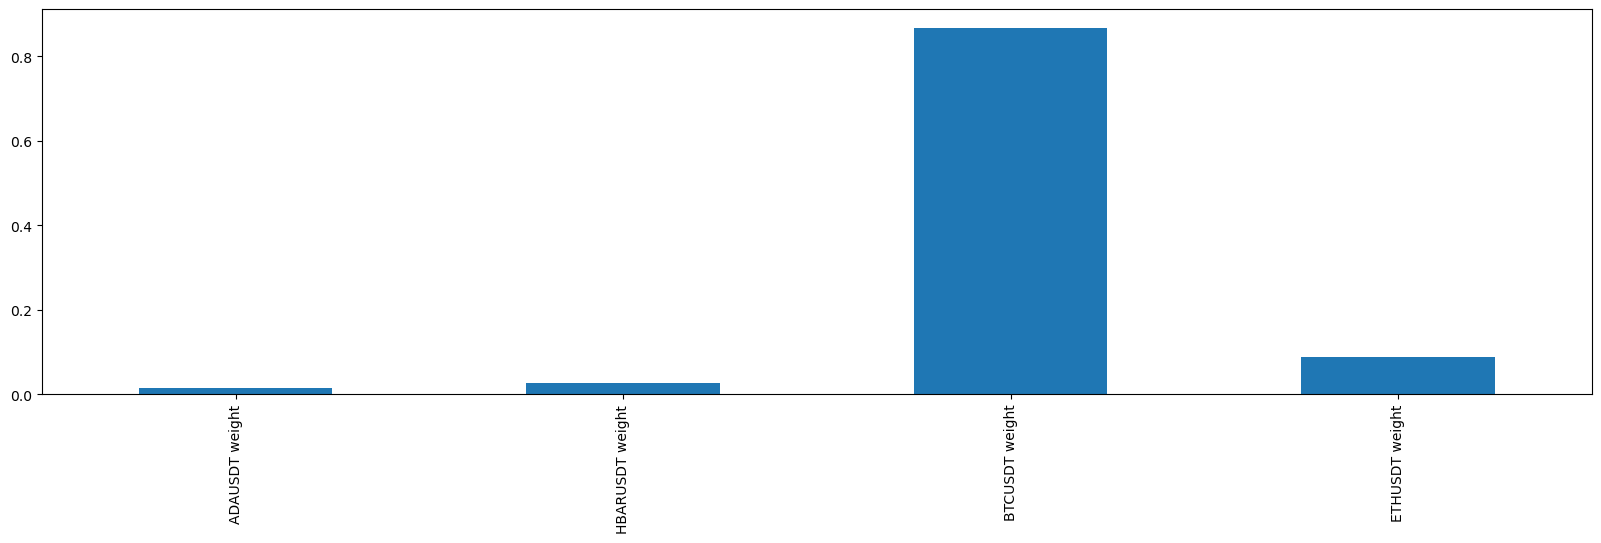

In [29]:
min_vol_port[2:99].plot.bar(figsize=(20,5));

<Axes: >

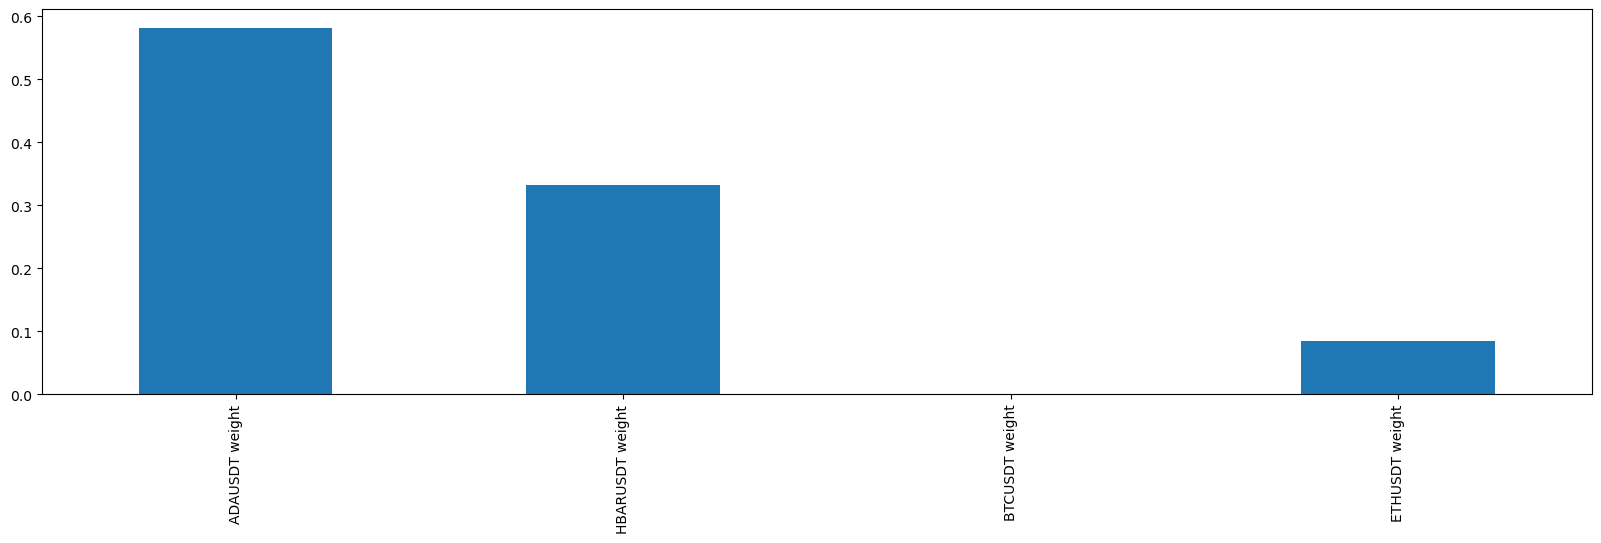

In [30]:
optimal_risky_port[2:99].plot.bar(figsize=(20,5))

In [31]:
optimal_risky_port[2:99].values 

array([5.82063912e-01, 3.32266557e-01, 5.61884056e-04, 8.51076475e-02])

In [32]:
min_vol_port[2:99].values 

array([0.01524905, 0.02765877, 0.86809192, 0.08900026])

In [33]:
portfolio.index.to_period('m').unique()

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
             '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
             '2024-01', '2024-02', '2024-03'],
            dtype='period[M]', name='Date')

In [34]:
asset_rebalance = []
desire_balance = []
total_rebalance = []
for i in range(len(portfolio)):
    port_returns = []
    port_volatility = []
    port_weights = []

    num_assets = len(portfolio.columns)
    num_portfolios = 10

    individual_rets = portfolio.resample('D').last().pct_change(fill_method=None).mean()

    for port in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights = weights/np.sum(weights)
        port_weights.append(weights)
        returns = np.dot(weights, induvidual_rets)
        port_returns.append(returns)

        var = variance_matrix.mul(weights, axis = 0).mul(weights, axis = 1).sum().sum()
        sd = np.sqrt(var)
        ann_sd = sd*np.sqrt(356)
        port_volatility.append(ann_sd)
    data = {'Returns':port_returns, 'Volatility':port_volatility}

    for counter, symbol in enumerate(portfolio.columns.tolist()):
        data[symbol+' weight'] = [w[counter] for w in port_weights]
    portfolios_V1 = pd.DataFrame(data)
    
    rf = 0.01
    optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]
    early_values = crypto_values.values
    b = early_values * portfolio.values[i] # balance
    tb = np.sum(b) # total balance
    b_rebalance = np.asarray(optimal_risky_port[2:99].values) * tb # Balance Rebalance
    cv_rebalance = b_rebalance/portfolio.iloc[i] # Crypto Value After Rebalance
    desire = b_rebalance-b # Desire each asset
    desire_balance.append(desire) 
    total_desire = np.sum(np.abs(desire))
    t_rebalance = np.sum(b_rebalance) - (total_desire*trading_fee)
    total_rebalance.append(t_rebalance) # Total balance after rebalance 
    #asset_rebalance.append(cv_rebalance)

total_rebalance = pd.DataFrame(total_rebalance).set_index(portfolio.index)


In [35]:
def rebalance_with_risk_tolerance(portfolio, crypto_values, risk_tolerance):
  # ... Existing code for portfolio returns, volatility calculations, etc. ...

  # Calculate the minimum acceptable return based on risk tolerance
  min_acceptable_return = rf + risk_tolerance * (market_return - rf)

  # Filter portfolios based on minimum acceptable return
  filtered_portfolios = portfolios_V1[portfolios_V1['Returns'] >= min_acceptable_return]

  # Choose the optimal portfolio within the acceptable risk range
  optimal_portfolio = filtered_portfolios.iloc[((filtered_portfolios['Returns'] - rf) / filtered_portfolios['Volatility']).idxmax()]

  # ... Existing code for rebalancing calculations using the optimal portfolio ...

  return total_rebalance, asset_rebalance, desire_balance, weightss


<Axes: xlabel='Date'>

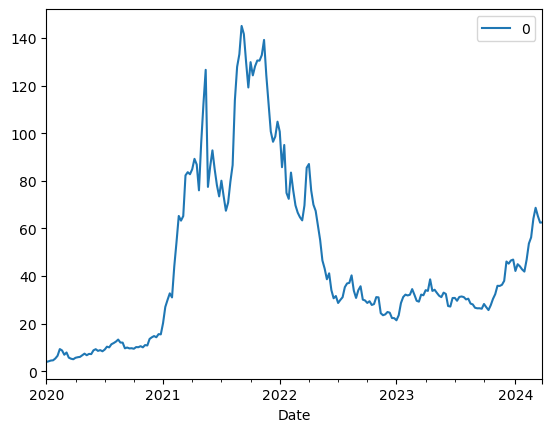

In [36]:
total_rebalance.plot()

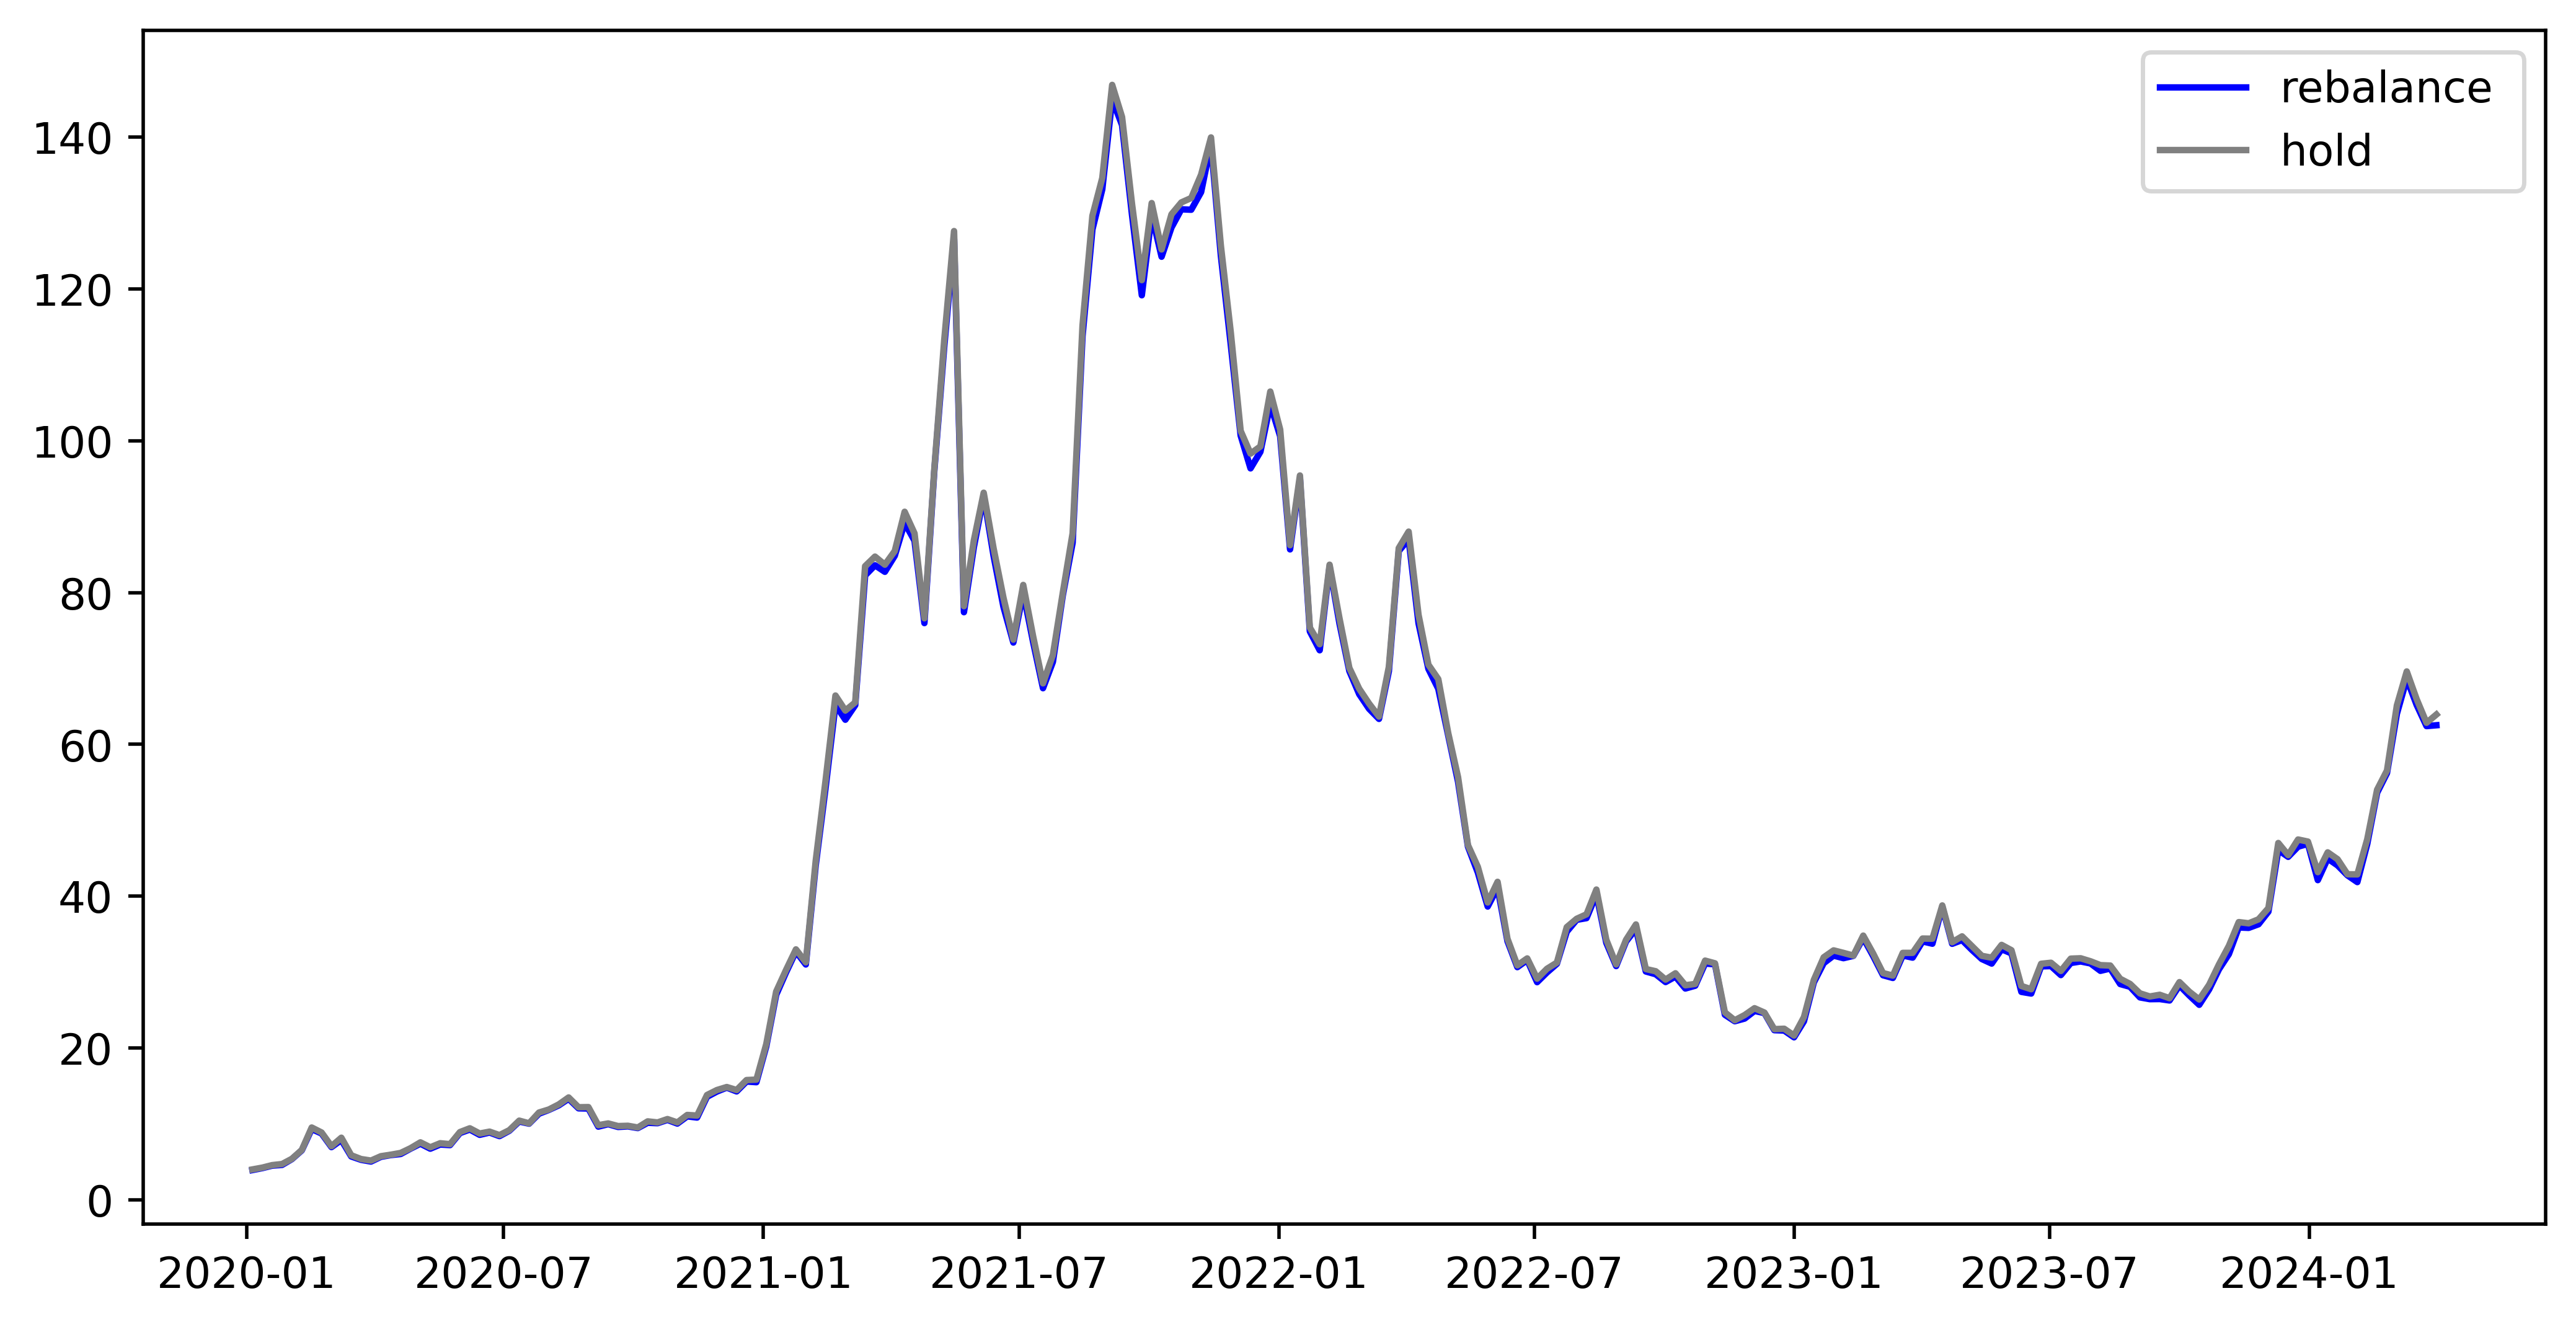

In [37]:
plt.figure(figsize=(10,5), dpi=500)
plt.plot(total_rebalance.index, total_rebalance.values,'-', label='rebalance ', color='blue')
plt.plot(total_balances.index, total_balances.values,'-', label='hold ', color='grey')
plt.legend()
plt.show()

In [38]:
for i in range(len(portfolio)):
    tes = portfolio.values[i-1]+portfolio.values[i]

In [39]:
portfolio.values[0-1]

array([6.499000e-01, 1.151000e-01, 6.941999e+04, 3.488910e+03])

# MPT